In [1]:
# импортируем необходимые модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [66]:
# загружаем данные из файла в формате CSV, указываем символ-разделитель и сохраняем данные в дата-фрейм (переменную df)
df = pd.read_csv('weather_classification_data.csv', sep = ',')

In [67]:
df.shape

(13200, 11)

In [68]:
df.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


In [69]:
df["Cloud Cover"].describe()


count        13200
unique           4
top       overcast
freq          6090
Name: Cloud Cover, dtype: object

In [95]:
# описательная статистика для всех (числовых) признаков
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,13200.0,19.127576,17.386327,-25.00,4.00,21.00,31.0000,109.00
Humidity,13200.0,68.547879,19.913514,20.00,57.00,70.00,84.0000,100.00
Wind Speed,13200.0,9.832197,6.908704,0.00,5.00,9.00,13.5000,48.50
Precipitation (%),13200.0,53.644394,31.946541,0.00,19.00,58.00,82.0000,109.00
Cloud Cover,13200.0,1.990227,1.012302,0.00,2.00,2.00,3.0000,3.00
Atmospheric Pressure,13200.0,1005.827896,37.199589,800.12,994.80,1007.65,1016.7725,1199.21
UV Index,13200.0,4.005758,3.856600,0.00,1.00,3.00,7.0000,14.00
Season,13200.0,1.849394,1.164824,0.00,1.00,2.00,3.0000,3.00
Visibility (km),13200.0,5.462917,3.371499,0.00,3.00,5.00,7.5000,20.00
Location,13200.0,1.094091,0.791420,0.00,0.00,1.00,2.0000,2.00


In [92]:
df['Humidity'] = np.where(df['Humidity'] > 100, 100 , df['Humidity'])

In [71]:
categorical = ["Location","Cloud Cover","Season","Weather Type"]
categorical

['Location', 'Cloud Cover', 'Season', 'Weather Type']

In [72]:
for i in categorical:
    k = df[i].unique()
    print(i , ":" , k)

Location : ['inland' 'mountain' 'coastal']
Cloud Cover : ['partly cloudy' 'clear' 'overcast' 'cloudy']
Season : ['Winter' 'Spring' 'Summer' 'Autumn']
Weather Type : ['Rainy' 'Cloudy' 'Sunny' 'Snowy']


In [73]:
from sklearn.preprocessing import LabelEncoder
for i in categorical:
    le = LabelEncoder()
    yhat = le.fit_transform(df[i])
    df[i] = yhat


In [74]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1


In [75]:
from sklearn.model_selection import train_test_split

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [77]:
features = [i for i in df.columns if i!= 'Weather Type']
X = df[features]
y = df['Weather Type']
X_train , X_test, y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = 42)

In [78]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9240, 10) (3960, 10) (9240,) (3960,)


In [79]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
knn_predict = knn.predict(X_test)

In [81]:
knn_accuracy = accuracy_score(knn_predict, y_test)
knn_accuracy

0.8896464646464647

In [82]:
print(classification_report(knn_predict, y_test))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       965
           1       0.90      0.86      0.88      1029
           2       0.94      0.93      0.94      1050
           3       0.86      0.92      0.89       916

    accuracy                           0.89      3960
   macro avg       0.89      0.89      0.89      3960
weighted avg       0.89      0.89      0.89      3960



In [83]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [84]:
rfc_predict = rfc.predict(X_test)

In [85]:
rfc_accuracy = accuracy_score(rfc_predict, y_test)
rfc_accuracy

0.9121212121212121

In [86]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [87]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [88]:
svc_predict = svc.predict(X_test)

In [89]:
svc_accuracy = accuracy_score(svc_predict, y_test)
svc_accuracy

0.8265151515151515

In [90]:
classifiers =["KNeighborsClassifier", "SVC", "Random Forest Classifier"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, svc_accuracy, rfc_accuracy]

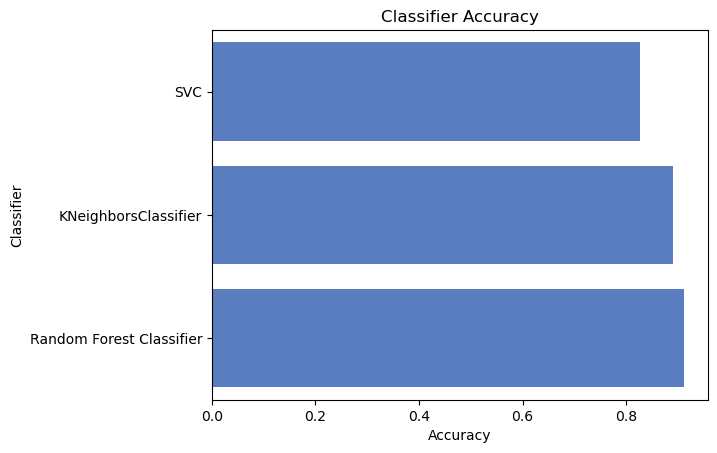

In [91]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

In [58]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.925974025974026
test accuracy:  0.8896464646464647
